# Predicción con Series de Tiempo

En este laboratorio se implementan 5 métodos diferentes para predecir con series de tiempo, utilizando 4 data sets distintos.

In [1]:
# se cargan las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import datetime
from statistics import *
import matplotlib.pylab as p
from math import sqrt
%matplotlib inline

In [2]:
# se cargan los data sets
df_1 = pd.read_csv("shampoo.csv")

In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [4]:
df_1.head()

Month  Sales
0  1-01  266.0
1  1-02  145.9
2  1-03  183.1
3  1-04  119.3
4  1-05  180.3

In [5]:
df_1['Month'] = df_1['Month'].apply(lambda x: datetime.datetime.strptime(x, '%m-%d') if type(x)==str else np.NaN)

In [6]:
df_1.index = pd.to_datetime(df_1['Month'])
df_1.drop(columns='Month', inplace=True)
df_1.head()

Sales
Month            
1900-01-01  266.0
1900-01-02  145.9
1900-01-03  183.1
1900-01-04  119.3
1900-01-05  180.3

In [7]:
df_1.tail()

Sales
Month            
1900-03-08  407.6
1900-03-09  682.0
1900-03-10  475.3
1900-03-11  581.3
1900-03-12  646.9

#### Train and split

In [8]:
#train_test_split
buf = df_1.copy()
#train_test_split
tra = buf['Sales'][:17].dropna()
tes = buf['Sales'][18:].dropna()

C:\Users\DIANA\AppData\Local\Temp/ipykernel_6492/1041177812.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sm.tsa.seasonal_decompose(buf.Sales.dropna(),freq=17)


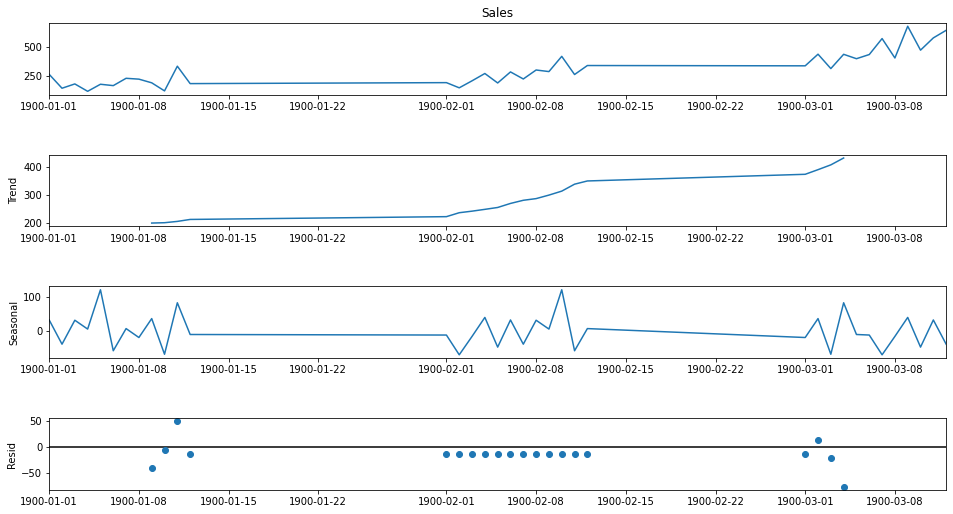

In [9]:
res = sm.tsa.seasonal_decompose(buf.Sales.dropna(),freq=17)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

#### 1. Promedio

In [10]:
def prediccion_promedio(historia, config):
    n, tipo_prom = config
    if tipo_prom == "prom":
        return mean(historia[-n:])
    return median(historia[-n:])

In [11]:
print(prediccion_promedio(df_1['Sales'], (24, 'prom')))

370.67083333333335


In [12]:
meses = df_1.resample('15D').mean()
meses

Sales
Month                 
1900-01-01  196.458333
1900-01-16         NaN
1900-01-31  262.791667
1900-02-15  339.700000
1900-03-02  491.172727

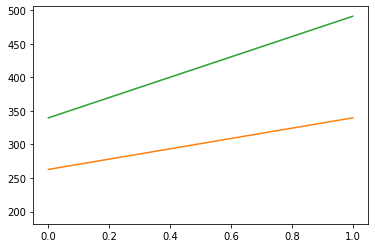

In [13]:
plt.plot(meses['1900-01-01': '1900-01-16'].values)
plt.plot(meses['1900-01-31': '1900-02-15'].values)
plt.plot(meses['1900-02-15': '1900-03-02'].values)

#### 2. SARIMAX

- Fuente de consulta: https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/ \
https://www.kaggle.com/poiupoiu/how-to-use-sarimax

In [14]:
sarimax = sm.tsa.statespace.SARIMAX(df_1, order=(1,1,1), seasonal_order=(1,1,1,12), exog = df_1,
                                 enforce_invertibility=False).fit()
sarimax.summary()

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\diana\appdata\local\programs\python\pyth

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  12.253
Date:                            Fri, 24 Sep 2021   AIC                            -12.506
Time:                                    20:11:10   BIC                             -5.693
Sample:                                         0   HQIC                           -10.793
                                             - 36                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Sales          1.0000      0.000   3677.813      0.000       0.999       1.001
ar.L1         -0.7666      0.009    -88.506      0.000      -0.784      -0.750
ma.L1         -0.0224      0.002    -11.913      0.000      -0.026      -0.019
ar.S.L12            0      0.000          0      1.000      -0.000       0.000
ma.S.L12            0      0.000          0      1.000      -0.000       0.000
sigma2          1e-10   4.41e-10      0.227      0.820   -7.63e-10    9.63e-10
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               388.91
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             4.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.56e+19. Standard errors may be unstable.
"""

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\diana\appdata\local\programs\python\pyth

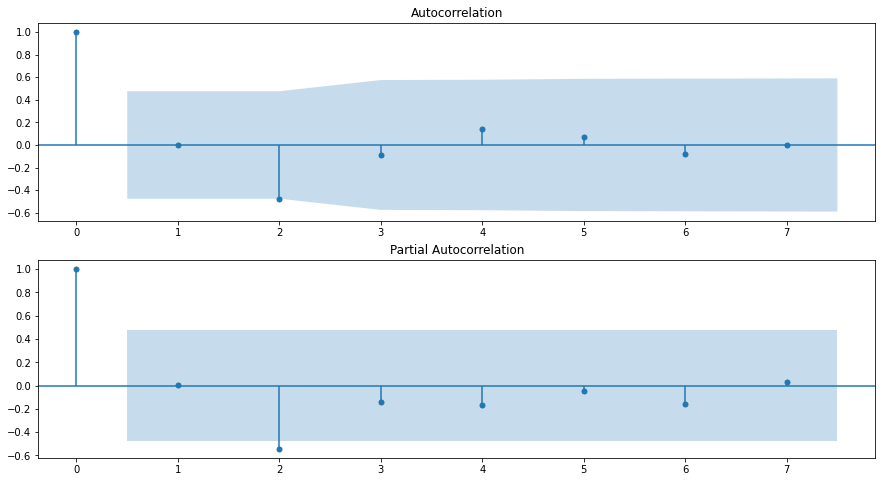

In [15]:
sarima = sm.tsa.statespace.SARIMAX(tra, order=(1,1,1), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False).fit()
sarima.summary()
res = sarima.resid
fig, ax = plt.subplots(2,1, figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=7, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=7, ax=ax[1])
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
pred = sarimax.predict('1900-01-01','1900-02-05', exog = tes)[1:]
tes1 = tes[:16]
print('SARIMAX model MSE:{}'.format(mean_squared_error(tes1, pred)))
print('SARIMAX model RMSE:{}'.format(sqrt(mean_squared_error(tes1, pred))))

SARIMAX model MSE:51606.13250000009
SARIMAX model RMSE:227.16983184393143


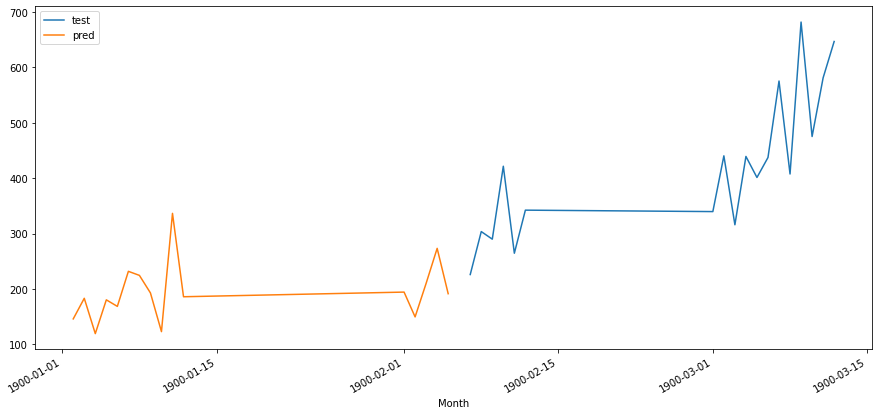

In [17]:
pd.DataFrame({'test':tes,'pred':pred}).plot(figsize=(15, 7))
plt.show()

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


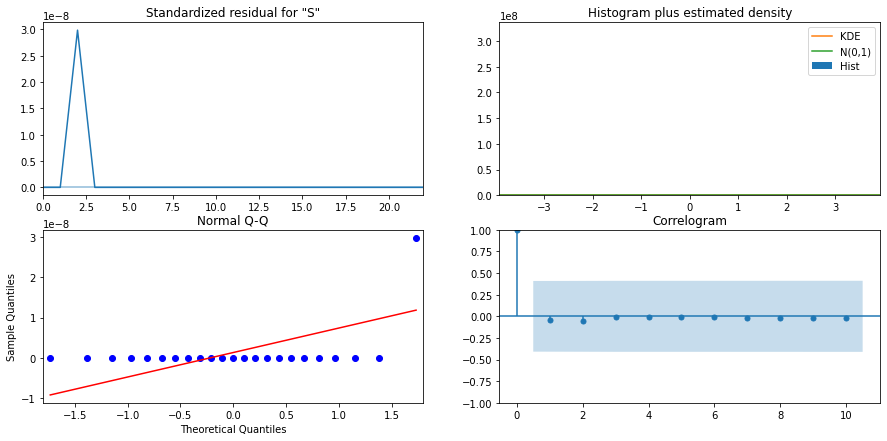

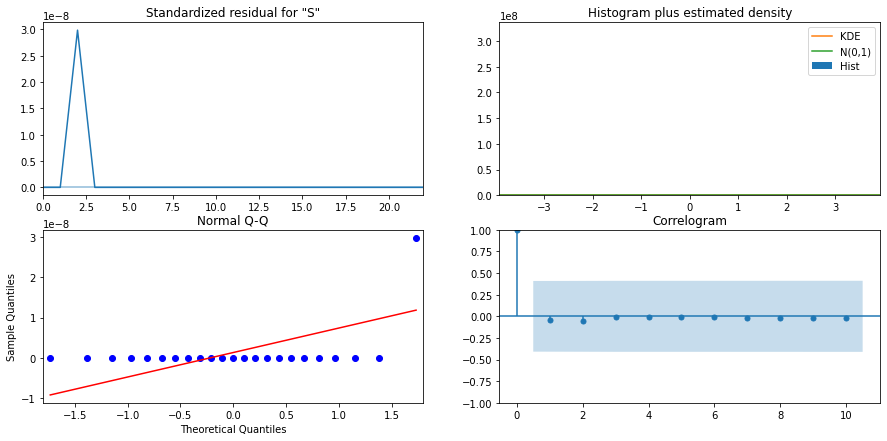

In [18]:
sarimax.plot_diagnostics(figsize=(15, 7))

In [19]:
#Mean Square Error
sarimax.mse
sqrt(sarimax.mse)

1.8259581238764853e-12

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\diana\appdata\local\programs\python\pyth

<AxesSubplot:xlabel='Month'>

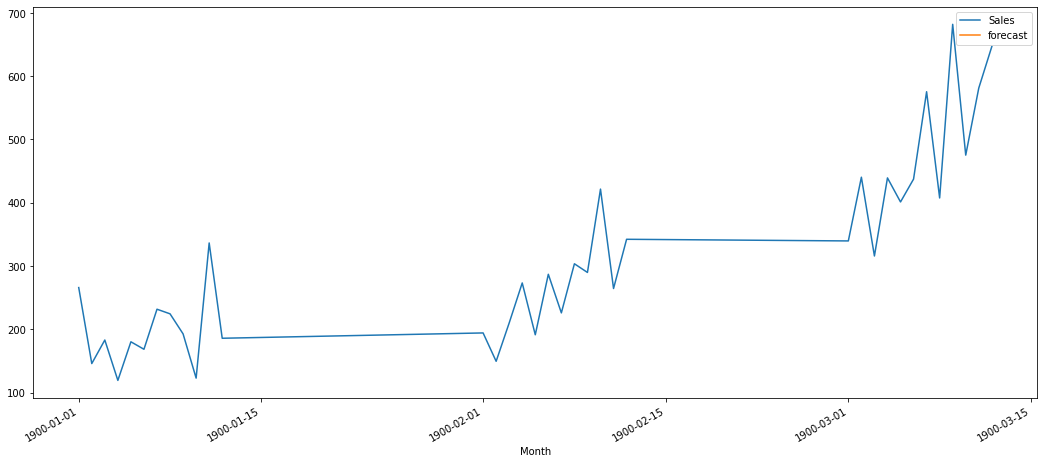

In [20]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(df_1['Sales'], order=(1, 1, 1), seasonal_order=(1,1,1,12))
results = model.fit()
df_1['forecast'] = results.predict(start=35, end=40, dynamic=True)
df_1[['Sales','forecast']].plot(figsize=(18,8))

In [21]:
from pandas.tseries.offsets import DateOffset
pred_date =[df_1.index[-1] + DateOffset(months=x) for x in range(0,24)]
pred_date = pd.DataFrame(index=pred_date[1:],columns=df_1.columns)
pred_date

Sales forecast
1900-04-12   NaN      NaN
1900-05-12   NaN      NaN
1900-06-12   NaN      NaN
1900-07-12   NaN      NaN
1900-08-12   NaN      NaN
1900-09-12   NaN      NaN
1900-10-12   NaN      NaN
1900-11-12   NaN      NaN
1900-12-12   NaN      NaN
1901-01-12   NaN      NaN
1901-02-12   NaN      NaN
1901-03-12   NaN      NaN
1901-04-12   NaN      NaN
1901-05-12   NaN      NaN
1901-06-12   NaN      NaN
1901-07-12   NaN      NaN
1901-08-12   NaN      NaN
1901-09-12   NaN      NaN
1901-10-12   NaN      NaN
1901-11-12   NaN      NaN
1901-12-12   NaN      NaN
1902-01-12   NaN      NaN
1902-02-12   NaN      NaN

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:>

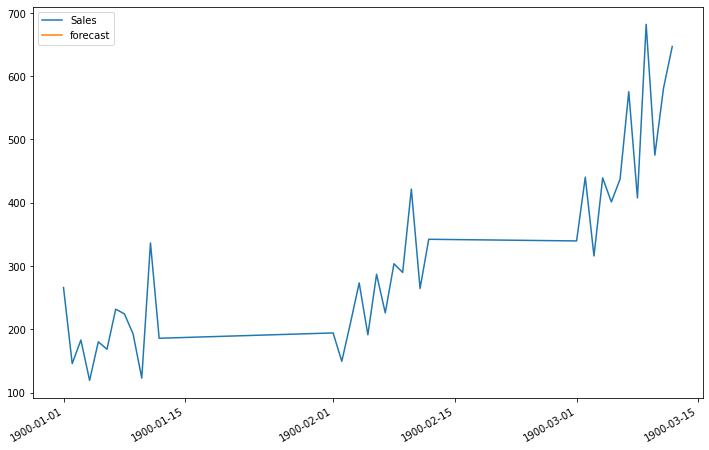

In [22]:
df_1 = pd.concat([df_1, pred_date])
df_1['forecast'] = results.predict(start = 35, end = 40, dynamic= True)  
df_1[['Sales', 'forecast']].plot(figsize=(12, 8))

#### 3. Winter-Holt

- Fuente de consulta: https://medium.com/analytics-vidhya/python-code-on-holt-winters-forecasting-3843808a9873

In [23]:
# se cargan los data sets
df_1 = pd.read_csv("shampoo.csv")

In [24]:
df_1['Month'] = df_1['Month'].apply(lambda x: datetime.datetime.strptime(x, '%m-%d') if type(x)==str else np.NaN)

In [25]:
df_1.index = pd.to_datetime(df_1['Month'])
df_1.drop(columns='Month', inplace=True)
df_1.head()
#train_test_split
buf = df_1.copy()

In [26]:
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<AxesSubplot:title={'center':'Sales Data'}, xlabel='Month'>

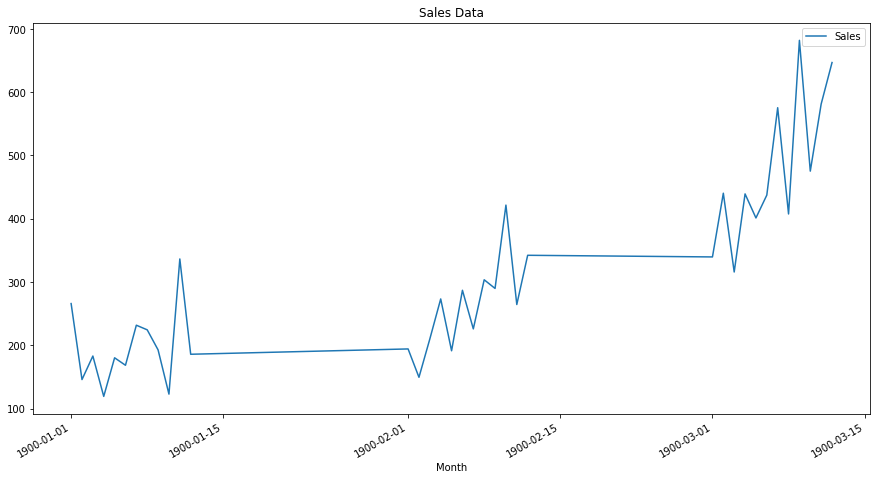

In [27]:
# plotting the original data
df_1[['Sales']].plot(title='Sales Data', figsize=(15, 8))

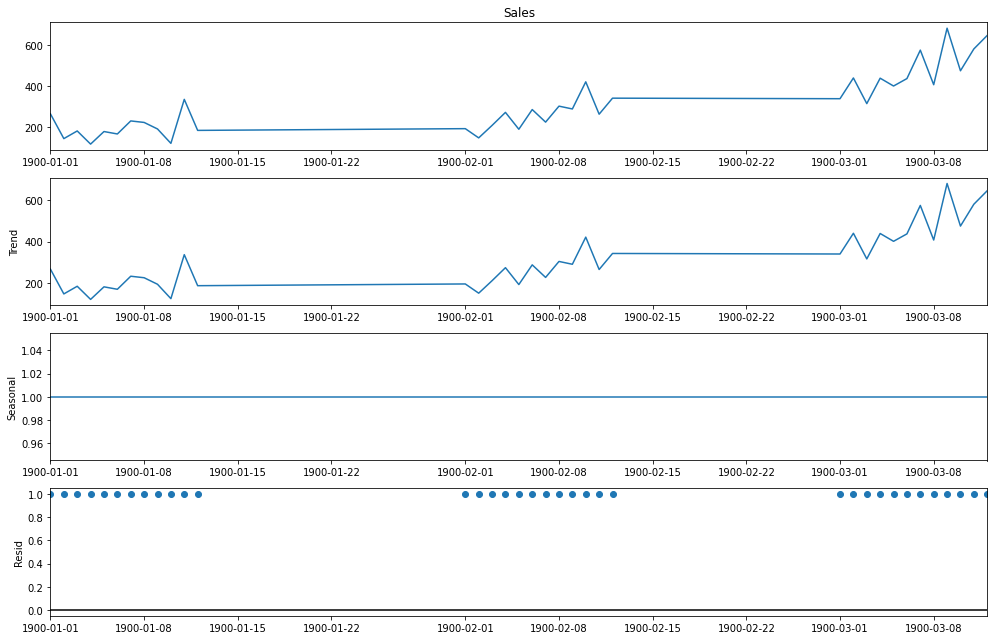

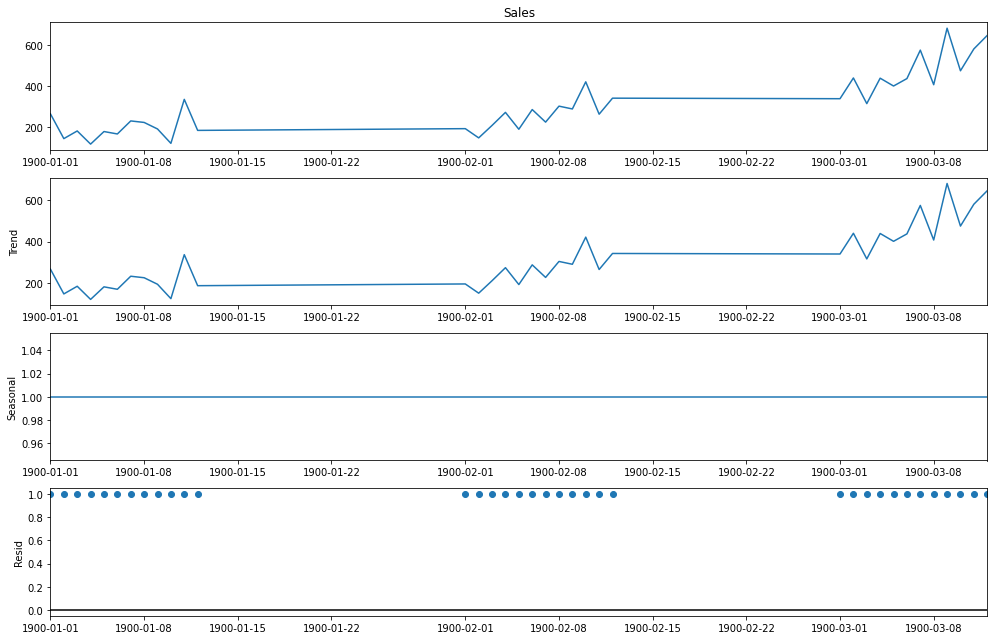

In [28]:
decompose_result = seasonal_decompose(x= df_1['Sales'], model='multiplicative', period = 1)
p.rcParams['figure.figsize'] = (14, 9)
decompose_result.plot()

In [29]:
# Set the frequency of the date time index as Monthly start as indicated by the data
df_1.index.Sales = 'MS'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2 * m)

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:title={'center':'Holt Winters Single Exponential Smoothing'}, xlabel='Month'>

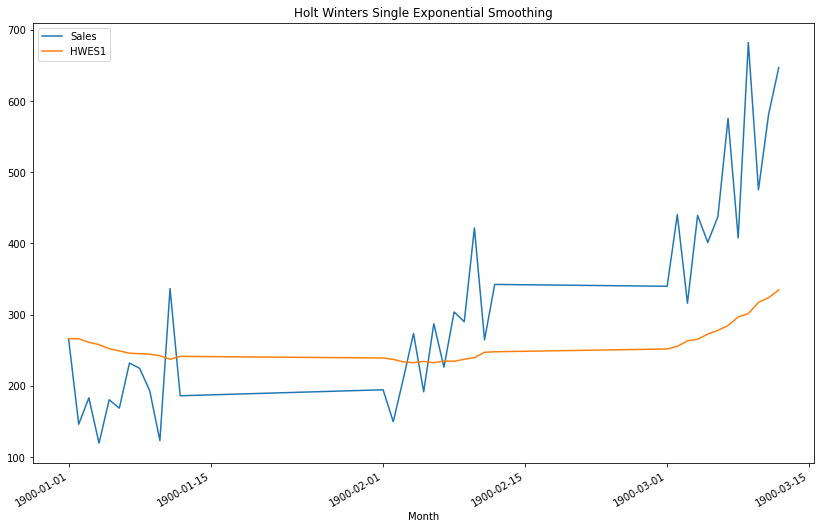

In [30]:
df_1['HWES1'] = SimpleExpSmoothing(df_1).fit(smoothing_level=alpha, optimized=False, use_brute=True).fittedvalues
df_1[['Sales','HWES1']].plot(title='Holt Winters Single Exponential Smoothing')

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  retu

<AxesSubplot:title={'center':'Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend'}, xlabel='Month'>

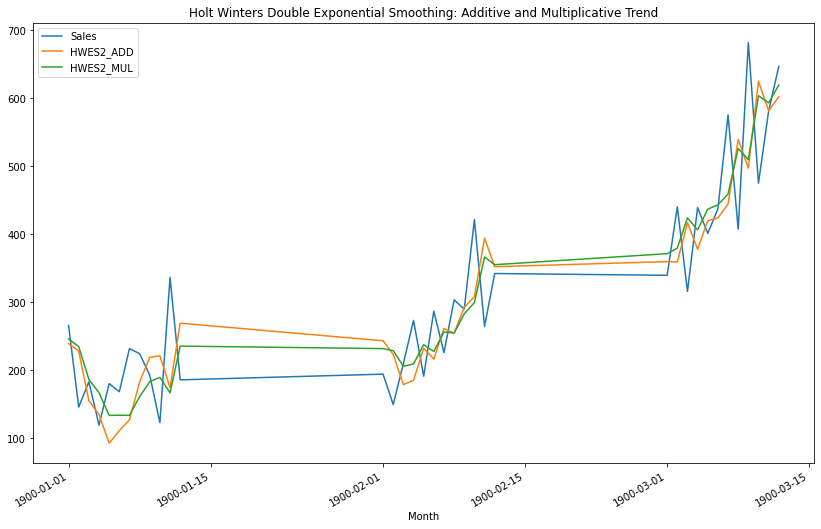

In [31]:
df_1['HWES2_ADD'] = ExponentialSmoothing(df_1['Sales'],trend='add').fit().fittedvalues
df_1['HWES2_MUL'] = ExponentialSmoothing(df_1['Sales'],trend='mul').fit().fittedvalues
df_1[['Sales','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


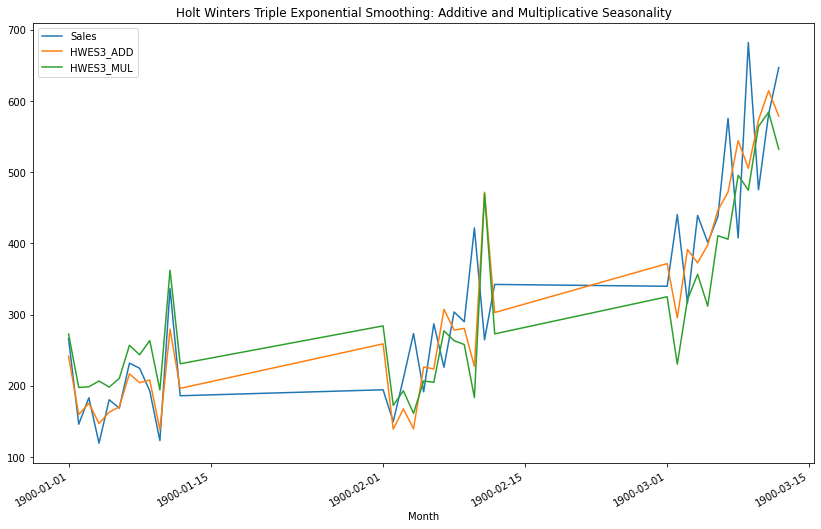

In [32]:
df_1['HWES3_ADD'] = ExponentialSmoothing(df_1['Sales'],trend='add', seasonal='add',seasonal_periods=12).fit().fittedvalues
df_1['HWES3_MUL'] = ExponentialSmoothing(df_1['Sales'],trend='mul', seasonal='mul',seasonal_periods=12).fit().fittedvalues
df_1[['Sales','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

In [33]:
#train_test_split
tra = buf[:24].dropna()
tes = buf[24:].dropna()

c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
c:\users\diana\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

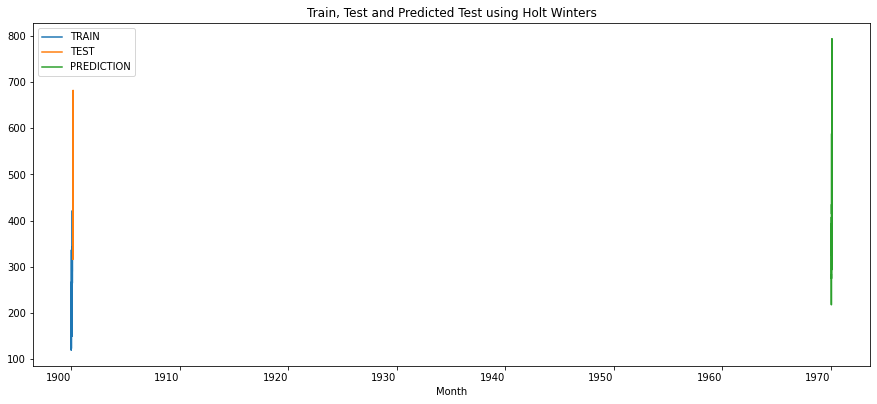

In [34]:
fitted_model = ExponentialSmoothing(tra['Sales'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(24)
tra['Sales'].plot(legend=True, label='TRAIN')
tes['Sales'].plot(legend=True, label='TEST', figsize=(15,7))
test_predictions.plot(legend=True, label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(tes, test_predictions[:12])}')
print(f'Mean Squared Error = {mean_squared_error(tes, test_predictions[:12])}')
print(f'Root Mean Squared Error = {sqrt(mean_squared_error(tes, test_predictions[:12]))}')

Mean Absolute Error = 138.05571654356513
Mean Squared Error = 29318.013248023042
Root Mean Squared Error = 171.22503686091892


#### 4. Red Neuronal
- Fuente de consulta: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [36]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
# df_1 = pd.read_csv("daily-total-female-births.csv")
dataframe = read_csv('shampoo.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

Epoch 1/100
20/20 - 1s - loss: 0.0312
Epoch 2/100
20/20 - 0s - loss: 0.0235
Epoch 3/100
20/20 - 0s - loss: 0.0179
Epoch 4/100
20/20 - 0s - loss: 0.0159
Epoch 5/100
20/20 - 0s - loss: 0.0153
Epoch 6/100
20/20 - 0s - loss: 0.0151
Epoch 7/100
20/20 - 0s - loss: 0.0155
Epoch 8/100
20/20 - 0s - loss: 0.0152
Epoch 9/100
20/20 - 0s - loss: 0.0151
Epoch 10/100
20/20 - 0s - loss: 0.0151
Epoch 11/100
20/20 - 0s - loss: 0.0151
Epoch 12/100
20/20 - 0s - loss: 0.0150
Epoch 13/100
20/20 - 0s - loss: 0.0151
Epoch 14/100
20/20 - 0s - loss: 0.0150
Epoch 15/100
20/20 - 0s - loss: 0.0151
Epoch 16/100
20/20 - 0s - loss: 0.0149
Epoch 17/100
20/20 - 0s - loss: 0.0152
Epoch 18/100
20/20 - 0s - loss: 0.0153
Epoch 19/100
20/20 - 0s - loss: 0.0150
Epoch 20/100
20/20 - 0s - loss: 0.0149
Epoch 21/100
20/20 - 0s - loss: 0.0152
Epoch 22/100
20/20 - 0s - loss: 0.0149
Epoch 23/100
20/20 - 0s - loss: 0.0149
Epoch 24/100
20/20 - 0s - loss: 0.0151
Epoch 25/100
20/20 - 0s - loss: 0.0149
Epoch 26/100
20/20 - 0s - loss: 0.

In [37]:
# calculate Train Root Mean Squared Error (RMSE) 
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 68.10 RMSE
Test Score: 177.56 RMSE


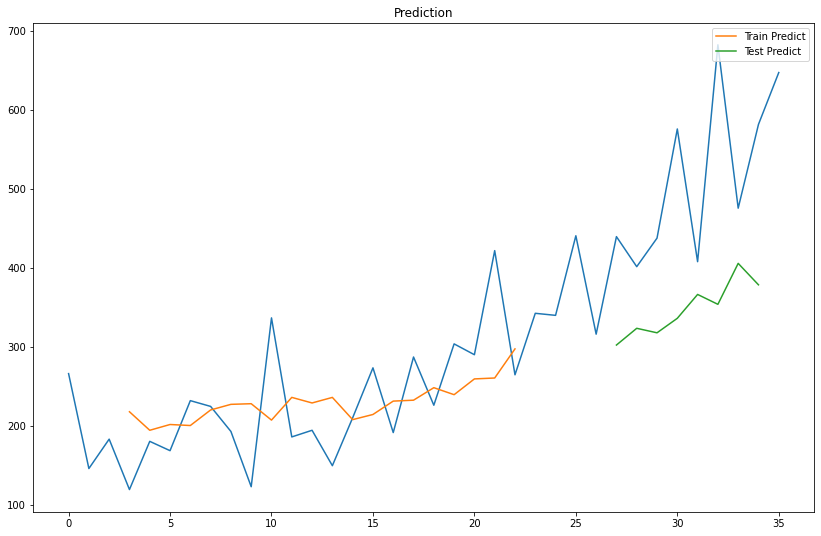

In [38]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot, label='Train Predict')
plt.plot(testPredictPlot, label='Test Predict')
plt.title('Prediction')
plt.legend(loc='upper right')
plt.show()